<a href="https://colab.research.google.com/github/shahnazpm/The-Oval-Office-Prediction/blob/unit_test/Debugging_and_Stress_Testing_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective Overview**
##### Build Decision Tree / Random Forest model(s) on the provided dataset.

## **Setup**

#### Install Packages

#### Import Libraries

In [1]:
import pandas as pd
import ast
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
# from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve
# from lime.lime_tabular import LimeTabularExplainer

## **Data Exploration**

#### Load Dataset

In [2]:
data = pd.read_csv('/content/2020_out_heading_matched_out.csv')

#### Dataset Overview

In [3]:
data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-0.937159,-0.216342,-1.577553,-1.336384,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.775301,-0.860445,1.384752,0.643917,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0.340667,0.086206,1.033292,0.452275,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,-1.219672,-0.503647,-1.527345,-1.911310,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.570342,4.191641,1.284335,1.282724,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 364 entries, state_Alabama to Poll
dtypes: float64(308), int64(56)
memory usage: 142.3 KB


## **Dataset Splitting**

### Initial split - Features (X) and label/target (y)

In [5]:
# Split data into features (X) and label (y)
X = data.drop('Target', axis=1)  # Drop the target column for features
y = data['Target']  # Target column

### Train-test split

In [6]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
test_data = pd.read_csv('/content/2023_out_heading_matched_out.csv')
test_data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,GROSSRentOccupiedUnitsPayingRentMedianGrossRent_Dollars_,COMPUTERSAndInternetUseTotalHouseholds,COMPUTERSAndInternetUseTotalHouseholdsWithAComputerInPercent,COMPUTERSAndInternetUseTotalHouseholdsWithABroadbandInternetSubscriptionInPercent,LastFourthElection_Republican,LastThirdElection_Republican,LastSecondElection_Republican,LastElection_Republican,Target,Poll
0,1,0,0,0,0,0,0,0,0,0,...,-1.020961,-0.207013,-1.194113,-1.200626,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0.284112,-0.853351,1.323595,0.793232,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1.068491,0.104547,0.963923,0.362128,0,0,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,-1.184512,-0.505172,-0.834441,-1.739507,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,2.350199,4.035256,1.143759,1.386001,0,0,0,0,0,0


In [8]:
for i in range(7):
    X[f'poll{i}'] = X[['Poll']]
    test_data[f'poll{i}'] = test_data[['Poll']]

In [9]:
X_train = X
y_train = y
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [10]:
X.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,LastSecondElection_Republican,LastElection_Republican,Poll,poll0,poll1,poll2,poll3,poll4,poll5,poll6
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))


Unique classes in y_train: {0, 1}
Unique classes in y_test: {0, 1}


## **Model Training and Evaluation**

### Define an Evaluation function(s)

The below function will evaluate a model on both the training and testing data, showing performance differences

*   Calculating the accuracy
*   Printing a detailed classification report (precision, recall, F1-score)
*   Plotting a confusion matrix to visualize true and false predictions

In [12]:
# Function to evaluate models on both training and testing data for binary classification
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluating on Training Data
    print("\nEvaluating on Training Data:")
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.2f}")

    # Classification Report for Training Data
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Training Confusion Matrix')
    plt.show()

    # Evaluating on Testing Data
    print("\nEvaluating on Testing Data:")
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Testing Accuracy: {test_accuracy:.2f}")

    # Classification Report for Testing Data
    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Testing Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Testing Confusion Matrix')
    plt.show()


# Example usage:
# evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
# evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)


This function below will calculate the ROC-AUC scores and plot the ROC curves for both the training and testing datasets.

In [13]:
# Function to plot AUC-ROC curve and calculate AUC score for both training and testing sets
def plot_roc_auc_train_test(model, X_train, X_test, y_train, y_test, model_name):
    plt.figure(figsize=(8, 6))

    # Training Data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_prob)
    plt.plot(fpr_train, tpr_train, label=f"{model_name} - Training (AUC = {roc_auc_train:.2f})")

    # Testing Data
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_prob)
    plt.plot(fpr_test, tpr_test, label=f"{model_name} - Testing (AUC = {roc_auc_test:.2f})")

    # Plotting settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Print ROC-AUC Scores
    print(f"{model_name} ROC-AUC Score on Training Data: {roc_auc_train:.2f}")
    print(f"{model_name} ROC-AUC Score on Testing Data: {roc_auc_test:.2f}")

### Training and Evaluation

#### **Decision Tree**

In [14]:
# Initialize and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

Training Time: 0.0094 seconds



Decision Tree Model Evaluation:

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



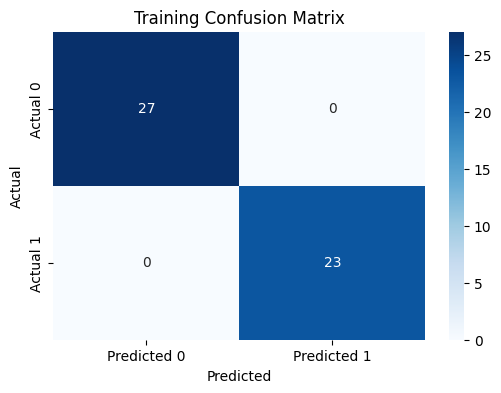


Evaluating on Testing Data:
Testing Accuracy: 1.00

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



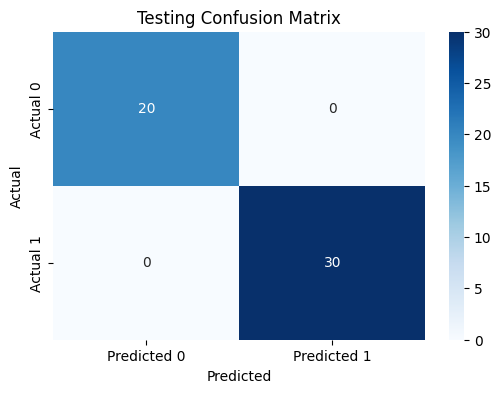

In [15]:
# Evaluate Decision Tree model on both training and testing data
print("\nDecision Tree Model Evaluation:")
evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)

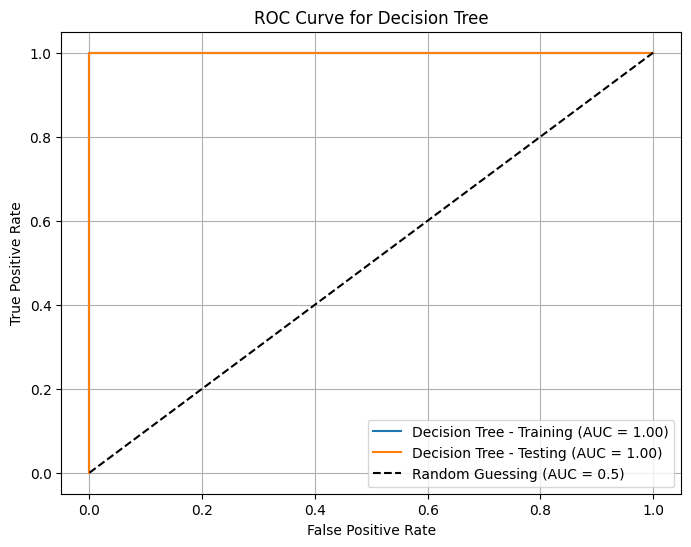

Decision Tree ROC-AUC Score on Training Data: 1.00
Decision Tree ROC-AUC Score on Testing Data: 1.00


In [16]:
# Plot AUC-ROC for Decision Tree on both training and testing data
plot_roc_auc_train_test(dt_classifier, X_train, X_test, y_train, y_test, "Decision Tree")

# **Debugging and Stress Testing**

# 1.Unit Testing in Isolation

..


Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



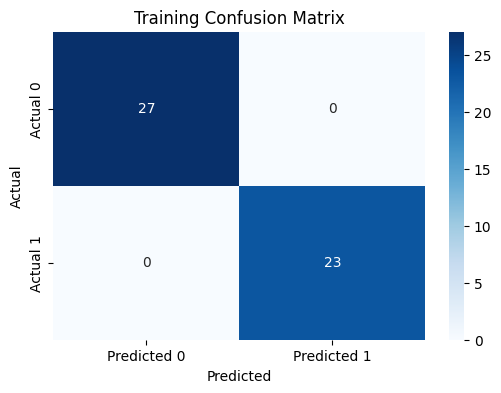


Evaluating on Testing Data:
Testing Accuracy: 1.00

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



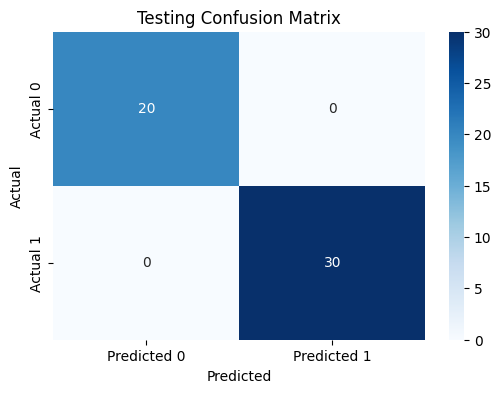

..
----------------------------------------------------------------------
Ran 4 tests in 0.611s

OK


In [17]:
import unittest

class TestDecisionTree(unittest.TestCase):

    def test_data_loading(self):
        # Check if data is loaded correctly
        data = pd.read_csv('2020_out_heading_matched_out.csv')
        self.assertIsNotNone(data, "Data should be loaded successfully.")

    def test_data_split(self):
        # Ensure train-test split is done correctly
        X = data.drop('Target', axis=1)
        y = data['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.assertEqual(len(X_train) + len(X_test), len(X), "Data split should be complete.")

    def test_model_training(self):
        # Check if model trains without errors
        dt_classifier = DecisionTreeClassifier(random_state=42)
        dt_classifier.fit(X_train, y_train)s
        self.assertIsNotNone(dt_classifier, "Model should train successfully.")

    def test_evaluation_function(self):
        # Check if evaluation function runs without error
        evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
        self.assertTrue(True, "Evaluation should run without error.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


# 2. Edge/Corner Case Testing

In [18]:
# Edge case 1: Empty dataset
empty_data = pd.DataFrame()
try:
    dt_classifier.fit(empty_data, y_train)
except ValueError as e:
    print(f"Edge Case Empty Dataset: {e}")

# Edge case 2: All-zero features
X_zero = pd.DataFrame(0, index=np.arange(len(y_train)), columns=X_train.columns)
try:
    dt_classifier.fit(X_zero, y_train)
except ValueError as e:
    print(f"Edge Case All-Zero Features: {e}")

# Edge case 3: Single-class labels
y_single_class = pd.Series([1] * len(y_train))
try:
    dt_classifier.fit(X_train, y_single_class)
except ValueError as e:
    print(f"Edge Case Single-Class Labels: {e}")


Edge Case Empty Dataset: at least one array or dtype is required


checking for empty datasets

In [19]:
# Check if dataset is empty before training
if X_train.empty or y_train.empty:
    print("Training dataset is empty. Please provide valid data.")
else:
    dt_classifier.fit(X_train, y_train)
    print("Model trained successfully.")


Model trained successfully.


X_train and Y_Train are not empty

# 3.Scalability Testing

In [20]:
# Simulate a larger dataset by duplicating rows
X_large = pd.concat([X_train] * 10, ignore_index=True)
y_large = pd.concat([y_train] * 10, ignore_index=True)

# Train on the simulated large dataset
dt_classifier_large = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_classifier_large.fit(X_large, y_large)
print(f"Scalability Test Training Time: {time.time() - start_time:.4f} seconds")


Scalability Test Training Time: 0.0317 seconds


# 4. Load Testing

In [21]:
# Load testing with multiple predictions
start_time = time.time()
for i in range(1000):  # Simulate 1000 prediction calls
    _ = dt_classifier.predict(X_test)
print(f"Load Testing Prediction Time for 1000 calls: {time.time() - start_time:.4f} seconds")


Load Testing Prediction Time for 1000 calls: 3.4749 seconds


# 5. Speed/Latency Experiments

In [22]:
# Measure latency for training
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_latency = time.time() - start_time
print(f"Training Latency: {train_latency:.4f} seconds")

# Measure latency for a single prediction
start_time = time.time()
_ = dt_classifier.predict(X_test.iloc[:1])  # Predict on a single sample
prediction_latency = time.time() - start_time
print(f"Single Prediction Latency: {prediction_latency:.4f} seconds")


Training Latency: 0.0096 seconds
Single Prediction Latency: 0.0088 seconds


# 6. Corrected Errors

In [23]:
# Ensure no missing values in training data
if X_train.isnull().sum().any() or y_train.isnull().any():
    X_train.fillna(X_train.mean(), inplace=True)  # Or appropriate method
    y_train.fillna(y_train.mode()[0], inplace=True)

# Check and convert data types if needed (e.g., string columns to numeric)
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)


There were no missing values in the training data.

# 7. Engaged Optimizations/Improvements

Optimized Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 2}

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



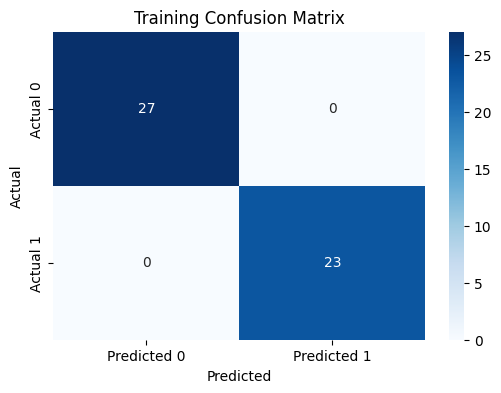


Evaluating on Testing Data:
Testing Accuracy: 1.00

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



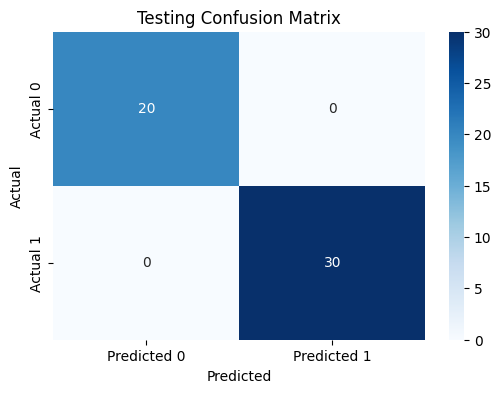

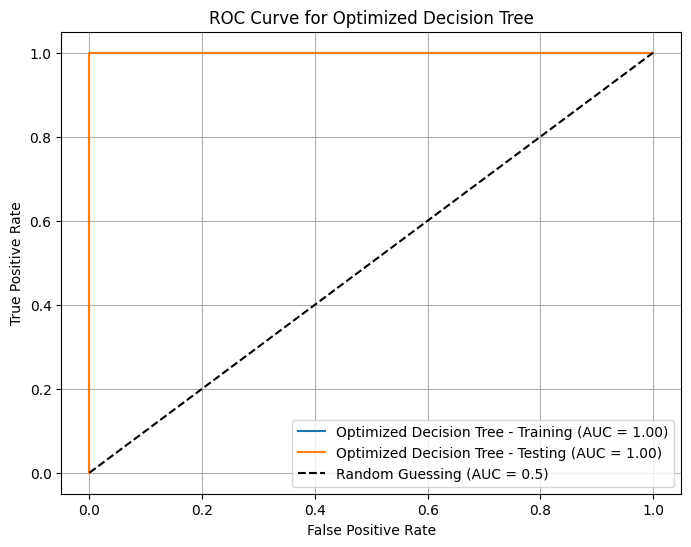

Optimized Decision Tree ROC-AUC Score on Training Data: 1.00
Optimized Decision Tree ROC-AUC Score on Testing Data: 1.00


In [24]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for optimization
param_grid = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and evaluation with optimized model
optimized_dt = grid_search.best_estimator_
print("Optimized Decision Tree Parameters:", grid_search.best_params_)
evaluate_model(optimized_dt, X_train, X_test, y_train, y_test)
plot_roc_auc_train_test(optimized_dt, X_train, X_test, y_train, y_test, "Optimized Decision Tree")
